In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
data = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
data

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
data.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
data.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [7]:
data.shape

(13490604, 7)

In [8]:
data.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [9]:
data.loc[2016]

lsoa_code                  E01000317
borough                       Barnet
major_category    Theft and Handling
minor_category    Other Theft Person
value                              0
year                            2009
month                              4
Name: 2016, dtype: object

In [10]:
data['value'].value_counts()

0      10071505
1       2141789
2        712478
3        275501
4        119483
         ...   
216           1
151           1
243           1
188           1
218           1
Name: value, Length: 247, dtype: int64

In [11]:
data.rename(columns={'value':'total'}, inplace=True)
data.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'total',
       'year', 'month'],
      dtype='object')

In [12]:
data['total'].isnull()

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Name: total, Length: 13490604, dtype: bool

In [13]:
data_filter = data[data['year'] > 2010]
data_filter.head()

,lsoa_code,borough,major_category,minor_category,total,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5


In [14]:
summary = data_filter.pivot_table('total',index=['major_category'] , columns='year', aggfunc={'total':'sum'})
summary.head()

year,2011,2012,2013,2014,2015,2016
major_category,,,,,,
Burglary,93315,93392,87222,76053,70489,68285
Criminal Damage,70914,62158,56206,59279,62976,64071
Drugs,57550,51776,50278,44435,39785,38914
Fraud or Forgery,0,0,0,0,0,0
Other Notifiable Offences,10264,10675,10811,13037,14229,15809


In [15]:
data['major_category'].values

array(['Burglary', 'Violence Against the Person',
       'Violence Against the Person', ..., 'Burglary', 'Robbery',
       'Violence Against the Person'], dtype=object)

In [16]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
print(plt.style.available)
mpl.style.use(['ggplot']) 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


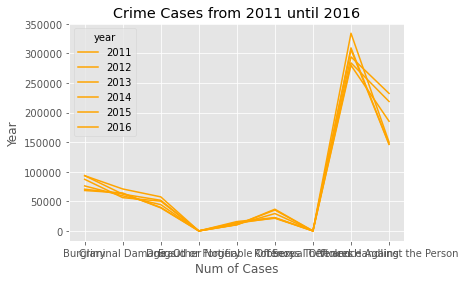

In [18]:
summary.plot(kind='line', color='orange')

plt.title('Crime Cases from 2011 until 2016')
plt.xlabel('Num of Cases')
plt.ylabel('Year')

plt.show()

In [19]:
df_summary = summary.transpose()
df_summary.head()

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740


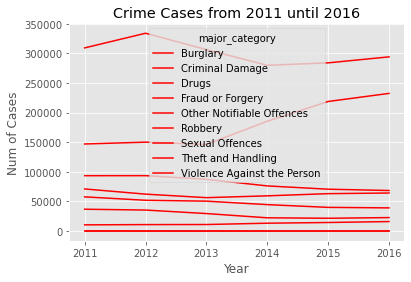

In [20]:
df_summary.plot(kind='line', color='Red')

plt.title('Crime Cases from 2011 until 2016')
plt.xlabel('Year')
plt.ylabel('Num of Cases')

plt.show()

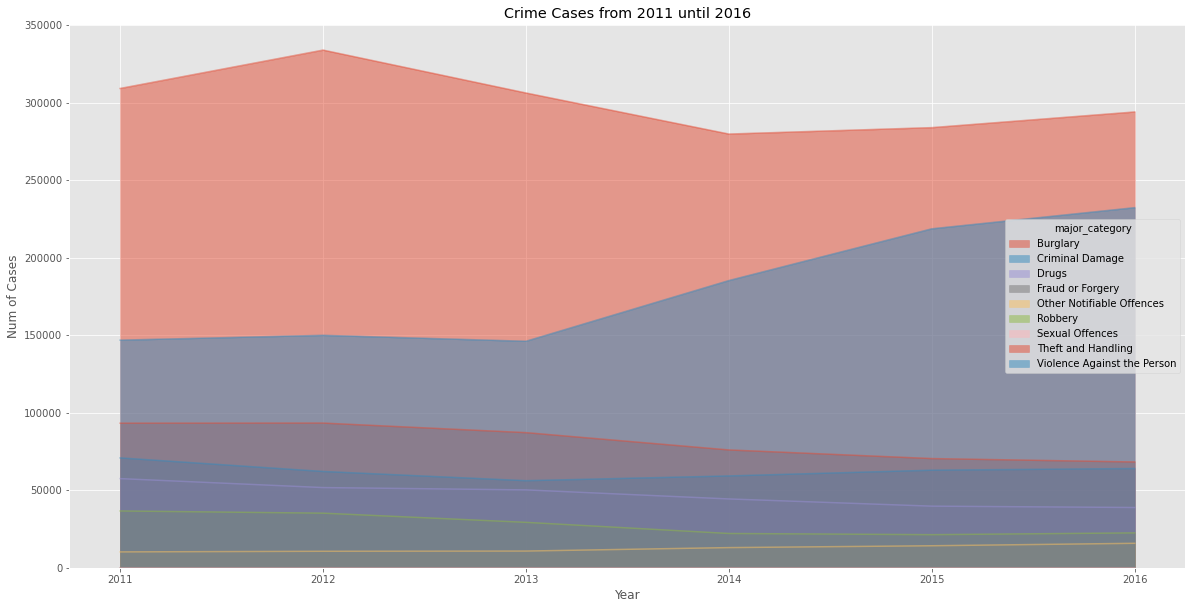

In [21]:
df_summary.plot(kind='area',
                stacked=False,
                figsize = (20, 10)
            )           

plt.title('Crime Cases from 2011 until 2016')
plt.xlabel('Year')
plt.ylabel('Num of Cases')

plt.show()

In [22]:
data_filter_2 = data[(data['year'] > 2010) & (data['major_category'] == 'Burglary')]
data_filter_2.head()

,lsoa_code,borough,major_category,minor_category,total,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
30,E01001317,Ealing,Burglary,Burglary in a Dwelling,0,2013,9
53,E01000869,Camden,Burglary,Burglary in Other Buildings,0,2013,3
75,E01001600,Greenwich,Burglary,Burglary in Other Buildings,0,2016,11


In [23]:
summary_2 = data_filter_2.pivot_table('total',index=['major_category'] , columns='borough', aggfunc={'total':'sum'})
summary_2.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
major_category,,,,,,,,,,,,,,,,,,,,,
Burglary,11768,24841,8711,18666,17109,17836,15,21210,19375,19190,...,10714,15869,16976,10562,18763,8481,15494,15566,16889,20694


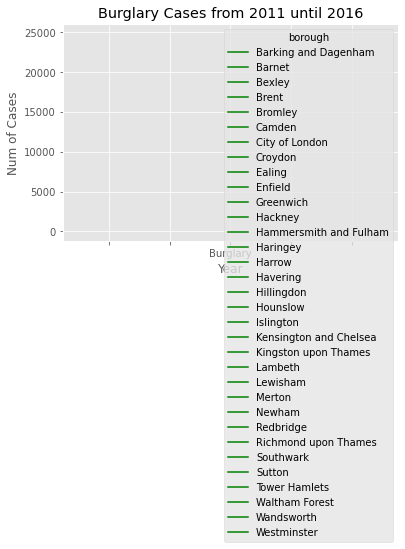

In [24]:
summary_2.plot(kind='line', color='Green')

plt.title('Burglary Cases from 2011 until 2016')
plt.xlabel('Year')
plt.ylabel('Num of Cases')

plt.show()

In [25]:
df_summary_2 = summary_2.transpose()
df_summary_2.head()

major_category,Burglary
borough,
Barking and Dagenham,11768
Barnet,24841
Bexley,8711
Brent,18666
Bromley,17109


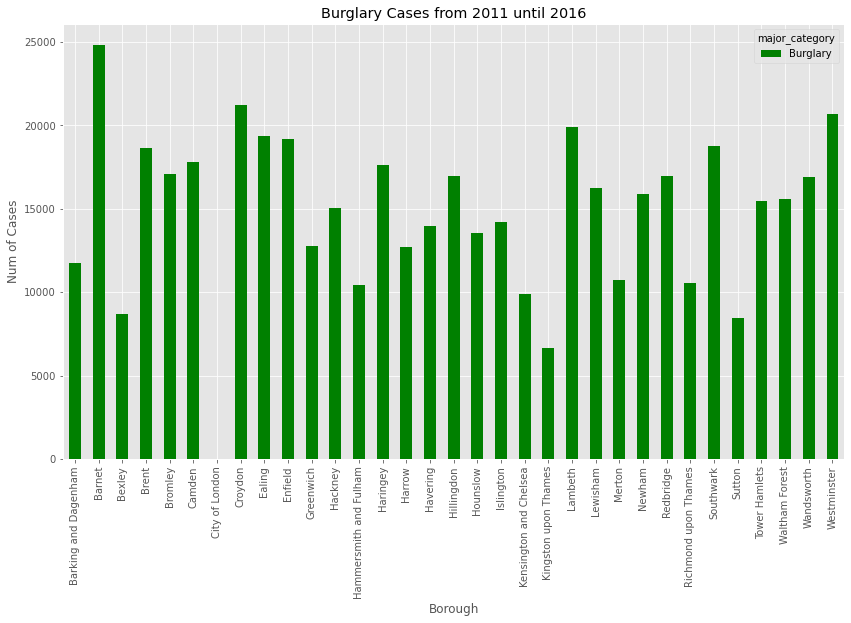

In [26]:
df_summary_2.plot(kind='bar', color='Green', figsize=(14, 8))

plt.title('Burglary Cases from 2011 until 2016')
plt.xlabel('Borough')
plt.ylabel('Num of Cases')

plt.show()

In [27]:
data_filter_3 = data[data['borough'] == 'Barnet']
data_filter_3.head()

,lsoa_code,borough,major_category,minor_category,total,year,month
44,E01000280,Barnet,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2014,3
72,E01000172,Barnet,Violence Against the Person,Other violence,0,2015,12
99,E01000223,Barnet,Violence Against the Person,Harassment,1,2014,1
119,E01000233,Barnet,Robbery,Business Property,0,2013,6
142,E01000228,Barnet,Drugs,Possession Of Drugs,0,2011,10


In [28]:
summary_3 = data_filter_3.pivot_table('total',index=['major_category'] , columns='year', aggfunc={'total':'sum'})
summary_3.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,3750,4090,4300,4873,4830,4262,3621,3853,3402
Criminal Damage,2918,2628,2715,2393,1985,1855,2095,2252,2183
Drugs,1264,1397,1177,1218,942,1041,1042,809,906
Fraud or Forgery,175,0,0,0,0,0,0,0,0
Other Notifiable Offences,297,273,268,285,281,300,361,389,499


<AxesSubplot:xlabel='major_category'>

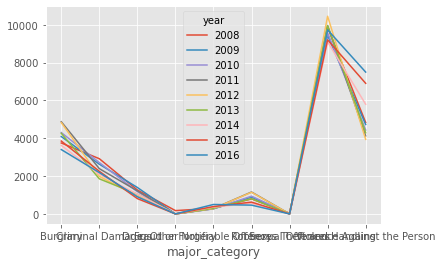

In [29]:
summary_3.plot(kind='line')

In [30]:
df_summary_3 = summary_3.transpose()
df_summary_3

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,3750,2918,1264,175,297,794,38,9872,4836
2009,4090,2628,1397,0,273,890,0,9441,4730
2010,4300,2715,1177,0,268,939,0,9582,4435
2011,4873,2393,1218,0,285,1159,0,9952,4127
2012,4830,1985,942,0,281,1142,0,10451,3942
2013,4262,1855,1041,0,300,802,0,9958,4292
2014,3621,2095,1042,0,361,560,0,9094,5799
2015,3853,2252,809,0,389,624,0,9204,6905
2016,3402,2183,906,0,499,464,0,9731,7499


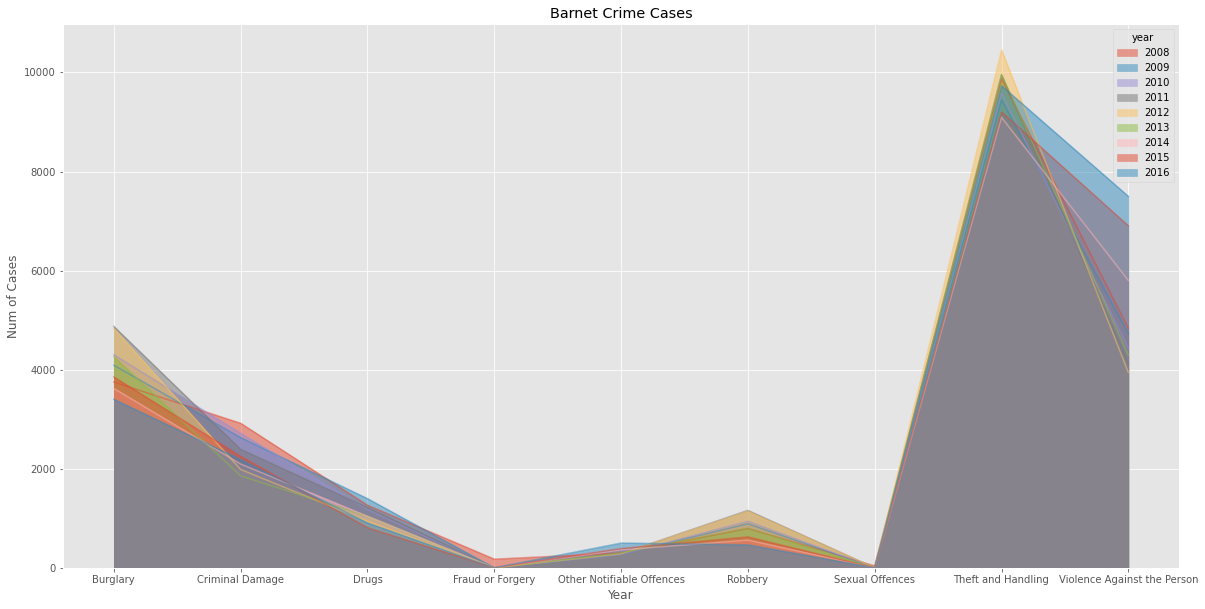

In [31]:
summary_3.plot(kind='area',
                stacked=False,
                figsize = (20, 10)
            )           

plt.title('Barnet Crime Cases')
plt.xlabel('Year')
plt.ylabel('Num of Cases')

plt.show()

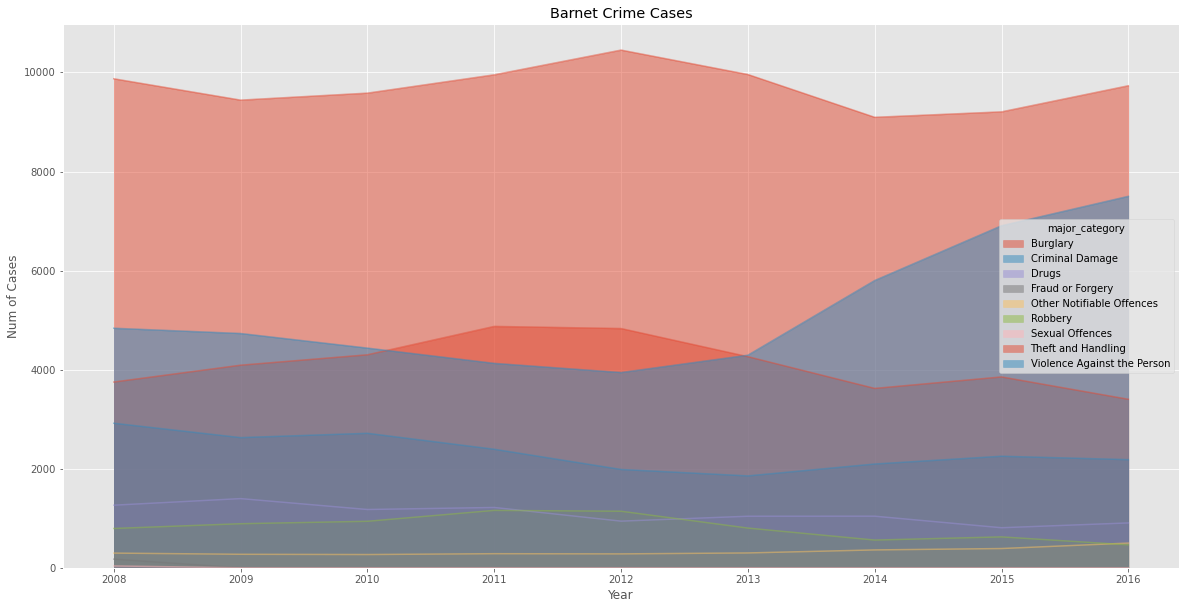

In [32]:
df_summary_3.plot(kind='area',
                stacked=False,
                figsize = (20, 10)
            )           

plt.title('Barnet Crime Cases')
plt.xlabel('Year')
plt.ylabel('Num of Cases')

plt.show()

In [33]:
data_filter_4 = data[data['year'] == 2016]
data_filter_4.head()

,lsoa_code,borough,major_category,minor_category,total,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2


In [34]:
summary_4 = data_filter_4.pivot_table('total',index=['major_category'] , columns='year', aggfunc={'total':'sum'})
summary_4.head()

year,2016
major_category,
Burglary,68285
Criminal Damage,64071
Drugs,38914
Fraud or Forgery,0
Other Notifiable Offences,15809


<AxesSubplot:xlabel='major_category'>

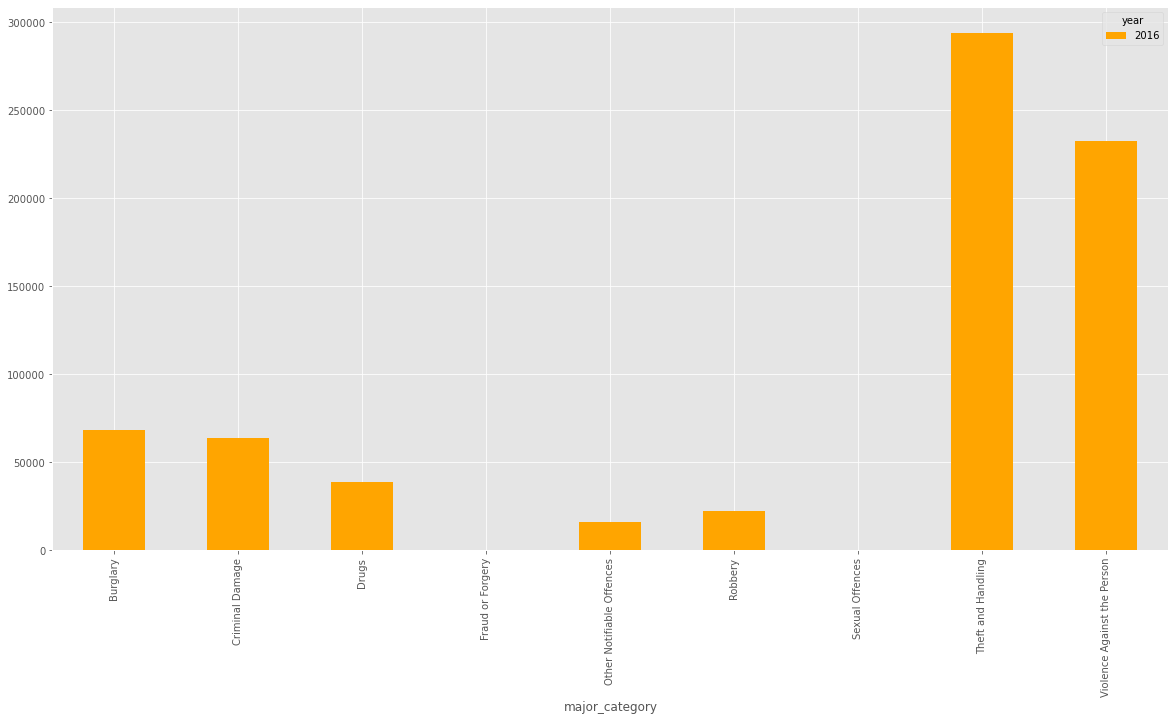

In [35]:
summary_4.plot(kind ='bar', figsize=(20,10), color = 'orange')

In [36]:
summary_7 = data_filter_4.pivot_table('total',index=['major_category'] , columns='borough', aggfunc={'total':'sum'})
summary_7.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
major_category,,,,,,,,,,,,,,,,,,,,,
Burglary,1287.0,3402.0,1123.0,2631.0,2214.0,2652.0,2.0,2738.0,2492.0,2541.0,...,1419.0,2115.0,1997.0,1359.0,2946.0,1233.0,2794.0,1873.0,2351.0,3218.0
Criminal Damage,1949.0,2183.0,1673.0,2280.0,2202.0,1935.0,2.0,3219.0,2562.0,2136.0,...,1418.0,2496.0,1650.0,1148.0,2621.0,1316.0,2357.0,1989.0,1836.0,2179.0
Drugs,919.0,906.0,646.0,2096.0,728.0,1493.0,10.0,1367.0,1355.0,1063.0,...,466.0,1684.0,1017.0,320.0,1838.0,461.0,1629.0,1042.0,870.0,2049.0
Fraud or Forgery,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Notifiable Offences,378.0,499.0,294.0,536.0,417.0,490.0,6.0,718.0,613.0,492.0,...,249.0,713.0,381.0,217.0,494.0,253.0,678.0,444.0,415.0,708.0


In [37]:
df_summary_7 = summary_7.transpose()
df_summary_7

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
borough,,,,,,,,,
Barking and Dagenham,1287.0,1949.0,919.0,0.0,378.0,534.0,0.0,5607.0,6067.0
Barnet,3402.0,2183.0,906.0,0.0,499.0,464.0,0.0,9731.0,7499.0
Bexley,1123.0,1673.0,646.0,0.0,294.0,209.0,0.0,4392.0,4503.0
Brent,2631.0,2280.0,2096.0,0.0,536.0,919.0,0.0,9026.0,9205.0
Bromley,2214.0,2202.0,728.0,0.0,417.0,369.0,0.0,7584.0,6650.0
Camden,2652.0,1935.0,1493.0,0.0,490.0,899.0,0.0,14088.0,7626.0
City of London,2.0,2.0,10.0,NaN,6.0,4.0,NaN,129.0,25.0
Croydon,2738.0,3219.0,1367.0,0.0,718.0,1139.0,0.0,9229.0,10302.0
Ealing,2492.0,2562.0,1355.0,0.0,613.0,669.0,0.0,10040.0,9396.0


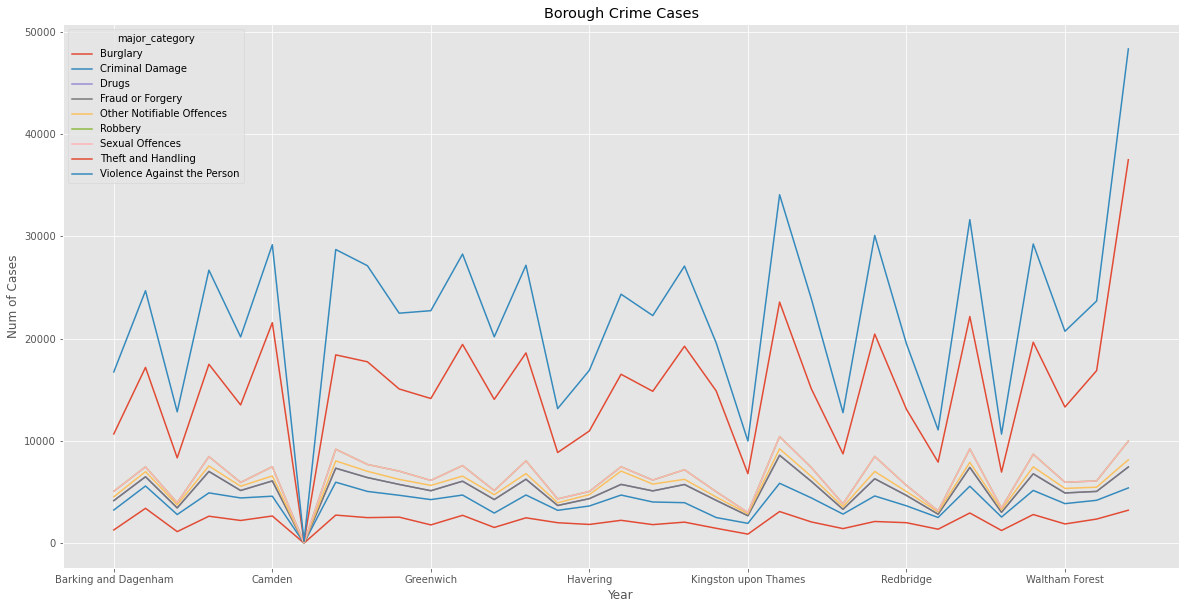

In [38]:
df_summary_7.plot(kind='line',
                stacked=True,
                figsize = (20, 10)
            )           

plt.title('Borough Crime Cases')
plt.xlabel('Year')
plt.ylabel('Num of Cases')

plt.show()

In [39]:
data_filter_5 = data[(data['year'] == 2016) & (data['major_category'] == 'Theft and Handling')]
data_filter_5.head()

,lsoa_code,borough,major_category,minor_category,total,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
18,E01002945,Kingston upon Thames,Theft and Handling,Theft From Shops,0,2016,11
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
68,E01004346,Waltham Forest,Theft and Handling,Motor Vehicle Interference & Tampering,0,2016,3


In [40]:
summary_5 = data_filter_5.pivot_table('total',index=['borough'] , columns='year', aggfunc={'total':'sum'})
summary_5.head()

year,2016
borough,
Barking and Dagenham,5607
Barnet,9731
Bexley,4392
Brent,9026
Bromley,7584


<AxesSubplot:xlabel='borough'>

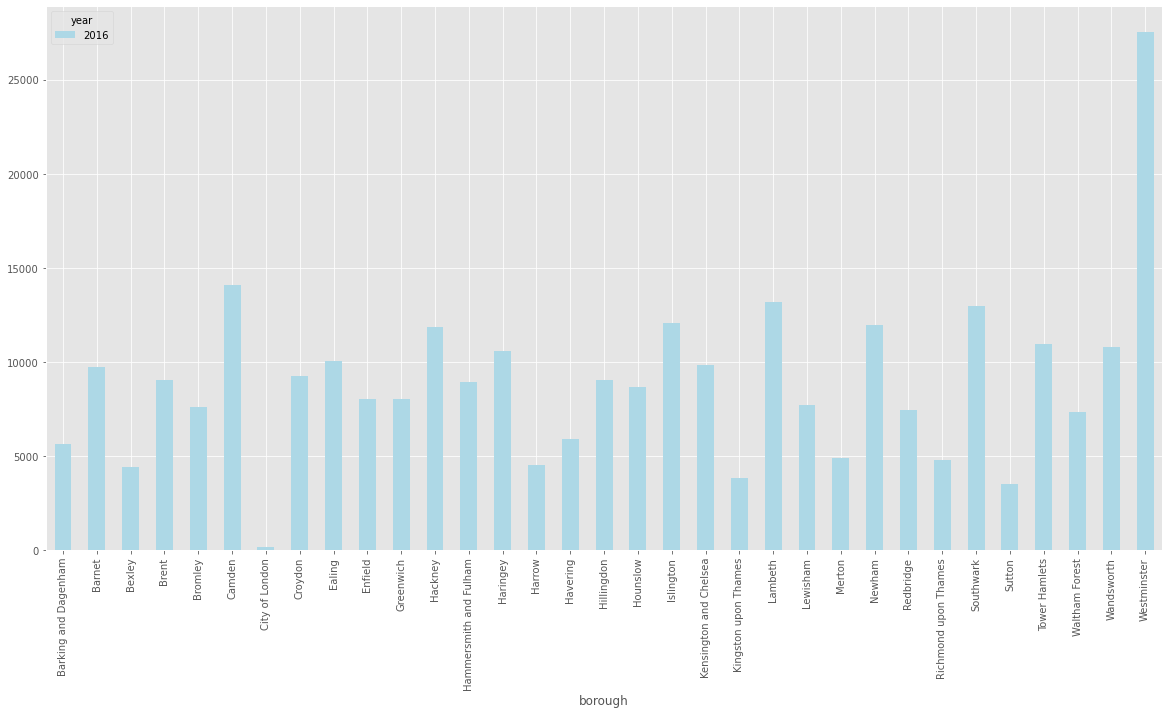

In [41]:
summary_5.plot(kind ='bar', figsize=(20,10), color = 'lightblue')

In [42]:
data_filter_6 = data[data['borough'] == 'Westminster']
data_filter_6.head()

,lsoa_code,borough,major_category,minor_category,total,year,month
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
46,E01004678,Westminster,Criminal Damage,Other Criminal Damage,0,2008,11
74,E01032513,Westminster,Violence Against the Person,Wounding/GBH,0,2009,9
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4
165,E01004677,Westminster,Theft and Handling,Other Theft Person,0,2015,10


In [43]:
summary_6 = data_filter_6.pivot_table('total',index=['major_category'] , columns='year', aggfunc={'total':'sum'})
summary_6.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,2962,2957,2682,2900,4083,3906,3435,3152,3218
Criminal Damage,2599,2564,2385,2246,2254,2080,2016,2082,2179
Drugs,4075,3894,4632,5670,4654,4151,2804,2102,2049
Fraud or Forgery,273,0,0,0,0,0,0,0,0
Other Notifiable Offences,588,611,660,652,641,762,800,726,708


In [44]:
df_summary_6 = summary_6.transpose()
df_summary_6

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,2962,2599,4075,273,588,1327,59,29266,6697
2009,2957,2564,3894,0,611,1410,0,29967,7053
2010,2682,2385,4632,0,660,1439,0,29191,7127
2011,2900,2246,5670,0,652,1814,0,33529,7432
2012,4083,2254,4654,0,641,2312,0,38152,7130
2013,3906,2080,4151,0,762,2198,0,33868,6887
2014,3435,2016,2804,0,800,1933,0,28144,8432
2015,3152,2082,2102,0,726,1497,0,27980,9856
2016,3218,2179,2049,0,708,1822,0,27520,10834


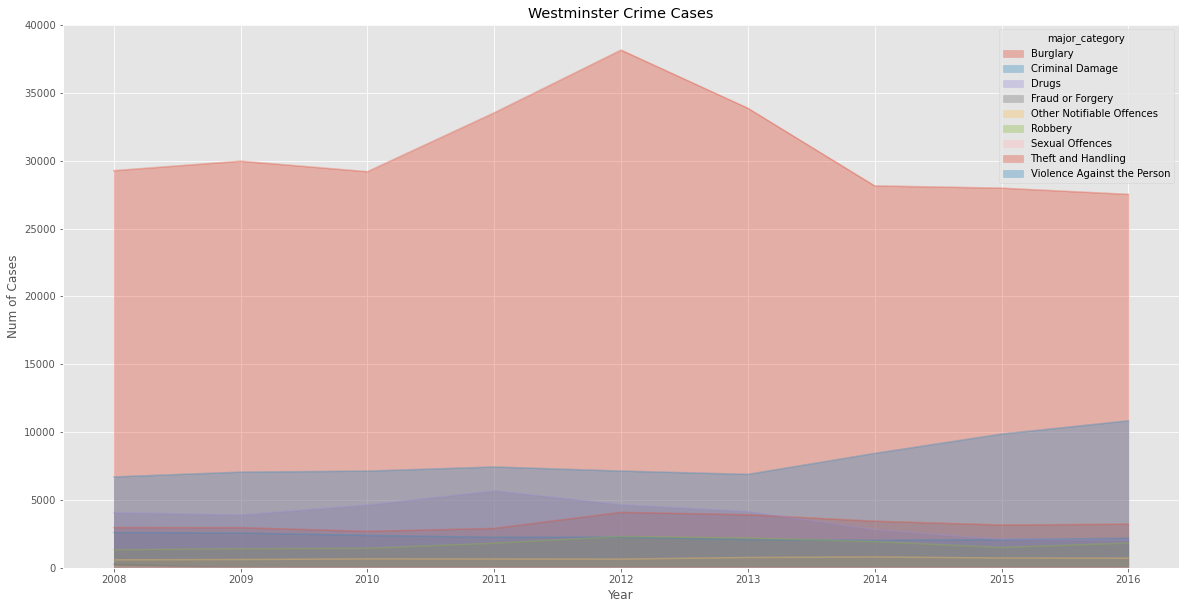

In [45]:
df_summary_6.plot(kind='area',
                alpha = 0.35,
                stacked=False,
                figsize = (20, 10)
            )           

plt.title('Westminster Crime Cases')
plt.xlabel('Year')
plt.ylabel('Num of Cases')

plt.show()

In [46]:
data_filter_7 = data_filter_6.groupby('major_category')['total'].sum()
data_filter_7

major_category
Burglary                        29295
Criminal Damage                 20405
Drugs                           34031
Fraud or Forgery                  273
Other Notifiable Offences        6148
Robbery                         15752
Sexual Offences                    59
Theft and Handling             277617
Violence Against the Person     71448
Name: total, dtype: int64

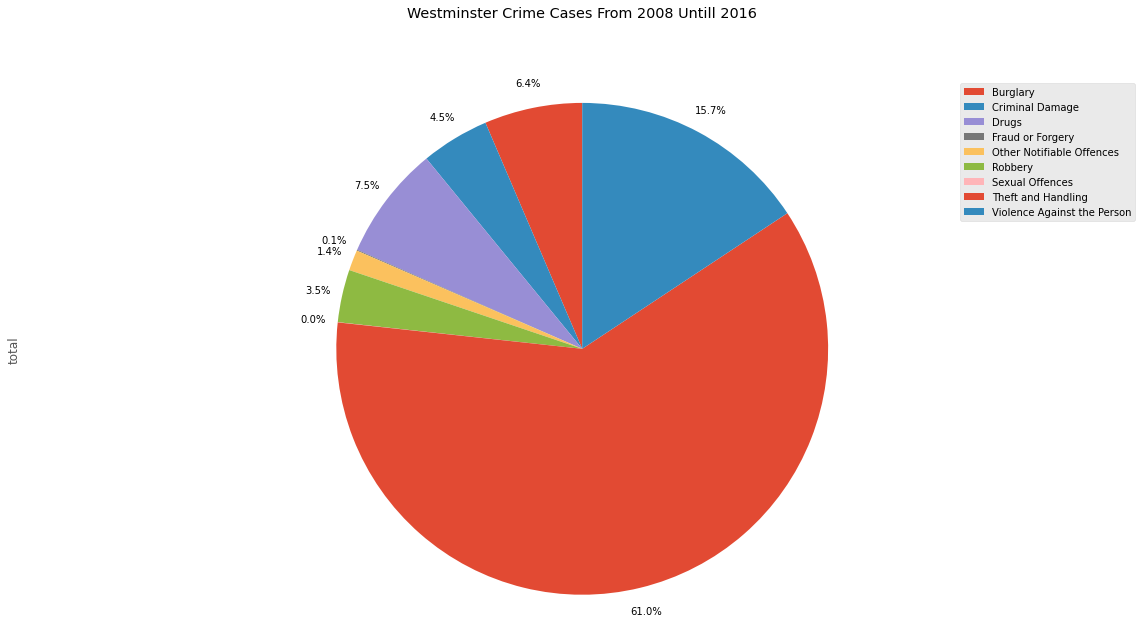

In [62]:
#chart kasus major pada borough Westminster

data_filter_7.groupby(['major_category']).sum().plot(kind='pie',
                                                figsize=(20, 10),
                                                autopct='%1.1f%%', 
                                                startangle=90,    
                                                shadow=False,       
                                                labels=None,         
                                                pctdistance=1.1
                                                )

plt.title('Westminster Crime Cases From 2008 Untill 2016', y=1.1) 
plt.axis('equal') 
plt.legend(labels=data_filter_7.index, loc='upper right')

plt.show()